# Dataset Analysis Notebook

### This notebook has the idea of opening up the datasets of the various pictures and the .csv files and examining the contents. From here we can start to determine the various things that make the X-ray database useful and either train the images in the standard PNG format using an image classifier or using some form of neural network with the DICOM format.
### To-Do list
 - <del>Load the specific images
 - <del>Create a dictionary for the types of images
 - <del>Create a 'map'(?) to link SOPInstanceUID to a specific image (need a call function)
 - Build the network in PyTorch
 - Do some exploratory data analysis
 - Train the network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

TRAIN_DATASETS_STR = '../datasets/images/train'
TEST_DATASETS_STR = '../datasets/images/test'


!which python3

/home/ethan/anaconda3/envs/kaggle-xray/bin/python3


In [2]:
df_train = pd.read_csv('../datasets/train_df.csv')
df_test = pd.read_csv('../datasets/test_df.csv')
df_train.head()

,SOPInstanceUID,Target,MultiImageType,ImageType,ImageType1,InstanceCreationDate,InstanceCreationTime,SOPClassUID,StudyDate,SeriesDate,...,WindowWidth,ImageType2,KVP,DistanceSourceToDetector,DistanceSourceToPatient,ExposureTime,XRayTubeCurrent,AcquisitionNumber,ImageType3,image_path
0,1.2.826.0.1.3680043.8.498.10025629581362719970...,0,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10025...
1,1.2.826.0.1.3680043.8.498.10036150326276641158...,15,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10036...
2,1.2.826.0.1.3680043.8.498.10038426859954986240...,12,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10038...
3,1.2.826.0.1.3680043.8.498.10050991192143676483...,14,NaN,NaN,NaN,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10050...
4,1.2.826.0.1.3680043.8.498.10053309524595490852...,3,1.0,ORIGINAL,PRIMARY,NaN,NaN,1.2.840.10008.5.1.4.1.1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./images/train/1.2.826.0.1.3680043.8.498.10053...


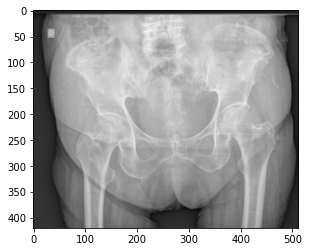

In [3]:
import matplotlib.image as mpimg

img = mpimg.imread('../datasets/images/train/1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125-c.png')
imgplot = plt.imshow(img, cmap="gray")
plt.show()

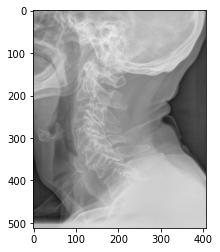

In [4]:
targets = {
    0: "abdomen",
    1: "ankle",
    2: "cervical spine",
    3: "chest",
    4: "clavicles",
    5: "elbow",
    6: "feet",
    7: "finger",
    8: "forearm",
    9: "hand",
    10: "hip",
    11: "knee",
    12: "lower leg",
    13: "lumbar spine",
    14: "others",
    15: "pelvis",
    16: "shoulder",
    17: "sinus",
    18: "skull",
    19: "thigh",
    20: "thoracic spine",
    21: "wrist"
}

# Create a dictionary of images that has the SOPInstanceUID as the key then the image as the value
import os
import cv2

name = df_train['SOPInstanceUID'][1737]
image_dict = {}

for filename in os.listdir(TRAIN_DATASETS_STR):
    f = os.path.join(TRAIN_DATASETS_STR, filename)
    if os.path.isfile(f):
        sliced = filename[:len(filename)-6]
        if sliced == name:
            img = cv2.imread(f)
            plt.imshow(img)

In [5]:
def imshow(img):
    plt.imshow(img)
    plt.show()
    
for filename in os.listdir(TRAIN_DATASETS_STR):
    f = os.path.join(TRAIN_DATASETS_STR, filename)
    if os.path.isfile(f):
        img = cv2.imread(f)
        img_name = filename[:len(filename)-6]
        image_dict[img_name] = img

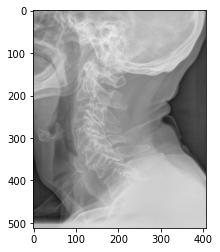

(512, 407, 3)

In [6]:
imshow(image_dict[name])
image_dict[name].shape